## Image slicing example

In [1]:
from dotenv import load_dotenv
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import math
import os

%matplotlib inline

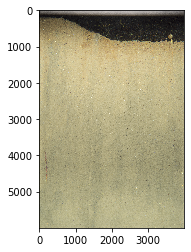

In [2]:
load_dotenv()

n = 128
stride = 128
channels = 3

f = os.getenv('TEST_FILE')
im = Image.open(f)
im_arr = np.array(im)[:,:,0:3]
plt.imshow(im_arr)

In [3]:
"""
Slices image into patches of size NxNx3 according to stride
Zero pads any patches that are cut off at borders of image
Returns numpy array of image patches
"""

def slice_image(img, n, stride, channels):
    x_dim, y_dim = img.shape[0], img.shape[1]
    
    # calculate number of output cubes
    num_x = math.ceil((x_dim-n)/stride + 1)
    num_y = math.ceil((y_dim-n)/stride + 1)

    # iterate through img 
    results = np.zeros((num_x*num_y, n, n, channels), dtype=int)
    counter = 0

    for i in range(num_y):
        y = 0 if i==0 else y + stride
        for j in range(num_x):
            x = 0 if j==0 else x + stride

            cube = img[x:x+n, y:y+n]
            results[counter,0:cube.shape[0],0:cube.shape[1]] = cube
            counter += 1
    return results

In [4]:
# Example usage
results = slice_image(im_arr, n, stride, channels)

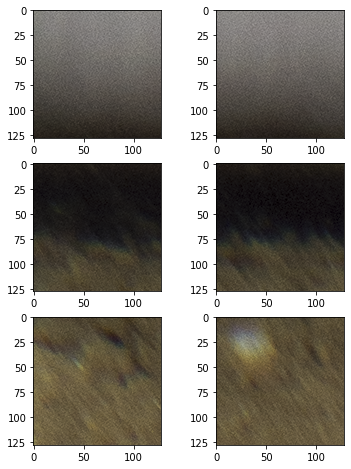

In [5]:
# Display results
fig, axs = plt.subplots(3,2,figsize=(6,8))

axs[0,0].imshow(results[0])
axs[1,0].imshow(results[1])
axs[2,0].imshow(results[2])
axs[0,1].imshow(results[47])
axs[1,1].imshow(results[48])
axs[2,1].imshow(results[49])